A more specific ctivity list extracted from https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories

## Step 0. import package

In [1]:
import requests
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import functools

from bs4 import BeautifulSoup  

## Step 1. grab data from web page

In [2]:
def check_link(url):
    try:
        r = requests.get(url)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r.text
    except:
        print('page not found')

def get_contents(ulist,rurl):
    soup = BeautifulSoup(rurl,'lxml')
    trs = soup.find_all('tr')
    for tr in trs:
        ui = [None for i in range(20)]
        for i,td in enumerate(tr):
            ui[i] = td.string
        ulist.append(ui)

In [223]:
def save_contents(urlist,title):
    try:
        with open(title,'w') as f:
            writer = csv.writer(f)
            #writer.writerow(['activity list'])
            for i in range(len(urlist)):
                lst = [urlist[i][j] for j in range(20)]
                writer.writerow(lst)
    except:
        pass

def main():
    prefix = 'https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/'
    suffix = ['Bicycling','Conditioning-exercise','Dancing','Fishing-Hunting','Home-Activity'
              ,'Home-Repair','Inactivity','Lawn-Garden','miscellaneous','Music-Playing','Occupation','Running'
              ,'Self-Care','Sexual-Activity','Sports','Transportation','Walking','Water-Activities'
              ,'winter-activtities','Religious-Activities','Volunteer-Activities','New-Activity-Updates']
    for s in suffix:
        urli = []
        url = prefix + s.lower()
        print(url)
        rs = check_link(url)
        get_contents(urli,rs)
        save_contents(urli,s.lower()+'.csv')
        
main()

https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/bicycling
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/conditioning-exercise
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/dancing
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/fishing-hunting
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/home-activity
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/home-repair
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/inactivity
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/lawn-garden
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/miscellaneous
https://sites.google.com/site/compendiumofphysicalactivities/Activity-Categories/music-playing
https://sites.google.com/site/compendiumofphysicalactivit

## Step 2. transfer csv file to pandas dataframe

In [3]:
import os
file_name = list(filter(lambda c: len(c) > 4 and c[-4:] == '.csv' and c[:3] != 'act', os.listdir('.')))

In [4]:
def go_csv(file):
    df = pd.read_csv(file,header=None)
    for col in df.columns:
        df[col] = df[col].map(lambda x: x if type(x) != type('a') else (x.rstrip('\n') if x != '\n' else np.nan))
    gen = (i for i in ['code', 'mets', 'description','source'])
    df = df.dropna(how='all',axis='columns').dropna(how='all',axis='rows').reset_index(drop=True)
    if file == 'miscellaneous.csv' or file == 'home-activity.csv': 
        df = df.drop(0).reset_index(drop=True).iloc[1:,[-5,-3,-1]].dropna(axis='rows').reset_index(drop=True)
    else:
        df = df.drop(0).reset_index(drop=True).iloc[1:,-3:].dropna(axis='rows').reset_index(drop=True)
    df['source'] = [file[:-4] for i in range(df.shape[0])]
    return df.rename(columns=lambda c:next(gen))

In [5]:
df = pd.concat([go_csv(file) for file in file_name])
df['mets'] = df['mets'].astype('float')
df

,code,mets,description,source
0,13009,1.8,"sitting on toilet, eliminating while standing ...",self-care
1,13010,1.5,"bathing, sitting",self-care
2,13020,2.5,"dressing, undressing, standing or sitting",self-care
3,13030,1.5,"eating, sitting",self-care
4,13035,2.0,"talking and eating or eating only, standing",self-care
5,13036,1.5,"taking medication, sitting or standing",self-care
6,13045,2.5,"hairstyling, standing",self-care
7,13046,1.3,"having hair or nails done by someone else, sit...",self-care
8,13050,2.0,"showering, toweling off, standing",self-care
0,09020,1.8,"drawing, writing, painting, standing",miscellaneous


## Step 3. basic exploration

### 1. dataframe info

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 27
Data columns (total 4 columns):
code           491 non-null object
mets           491 non-null float64
description    491 non-null object
source         491 non-null object
dtypes: float64(1), object(3)
memory usage: 19.2+ KB


### 2. group analysis

In [303]:
df.groupby(['source']).describe()

mets                                                \
                      count      mean       std  min    25%   50%     75%   
source                                                                      
bicycling              10.0  9.660000  4.271664  4.0  7.100  8.50  13.000   
conditioning-exercise  28.0  6.525000  3.048816  1.3  4.550  6.40   8.125   
dancing                 9.0  6.400000  1.685972  4.5  5.000  5.50   7.500   
fishing-hunting        12.0  3.858333  1.441248  2.0  2.500  3.75   5.000   
home-activity          47.0  3.280851  1.524672  1.3  2.400  3.00   3.500   
home-repair            19.0  4.489474  0.895603  3.0  4.250  4.50   5.000   
inactivity              7.0  1.214286  0.146385  1.0  1.150  1.30   1.300   
lawn-garden            28.0  4.307143  1.295842  1.5  3.450  4.15   5.125   
miscellaneous          16.0  2.150000  0.661312  1.3  1.800  1.80   2.500   
music-playing          12.0  2.691667  0.828425  1.8  1.950  2.40   3.500   
new-activity-updates    2.0  3.000000  0.707107  2.5  2.750  3.00   3.250   
occupation             68.0  4.776471  2.831176  1.3  2.500  4.00   6.500   
religious-activities   23.0  2.400000  1.097104  1.3  1.650  2.00   3.300   
running                16.0  9.837500  3.230041  4.5  8.000  9.40  11.200   
self-care               9.0  1.844444  0.441902  1.3  1.500  1.80   2.000   
sexual-activity         3.0  1.966667  0.763763  1.3  1.550  1.80   2.300   
sports                 74.0  6.170270  2.517159  2.5  4.000  6.00   7.800   
transportation          5.0  3.020000  1.762668  1.3  2.500  2.50   2.800   
volunteer-activities   19.0  3.157895  1.245577  1.3  2.150  3.00   3.900   
walking                32.0  5.490625  2.636635  2.0  3.225  5.00   8.000   
water-activities       36.0  6.675000  3.454965  2.5  3.500  5.90   9.575   
winter-activtities     16.0  8.312500  3.796819  3.5  5.450  7.00   9.875   

                             
                        max  
source                       
bicycling              16.0  
conditioning-exercise  14.0  
dancing                 9.5  
fishing-hunting         6.0  
home-activity           9.0  
home-repair             6.0  
inactivity              1.3  
lawn-garden             6.3  
miscellaneous           3.5  
music-playing           4.0  
new-activity-updates    3.5  
occupation             17.5  
religious-activities    5.0  
running                16.0  
self-care               2.5  
sexual-activity         2.8  
sports                 12.8  
transportation          6.0  
volunteer-activities    5.8  
walking                12.0  
water-activities       15.8  
winter-activtities     15.5

## Step 4. basic visualization

### 1. METs distribution in whole dataset

In [6]:
def dist_plot(data,xlabel,ylabel,title,name):
    plt.close('all')
    fig = plt.figure(figsize=(7,5))
    sns.distplot(data,color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    sns.despine()
    plt.savefig(name,bbox_inches='tight')
    plt.show()

/Users/ice/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


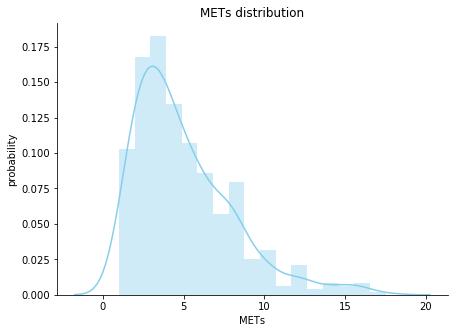

In [7]:
dist_plot(df['mets'],'METs','probability','METs distribution','METs_distribution.png')

### 2. METs mean value of each group

/Users/ice/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


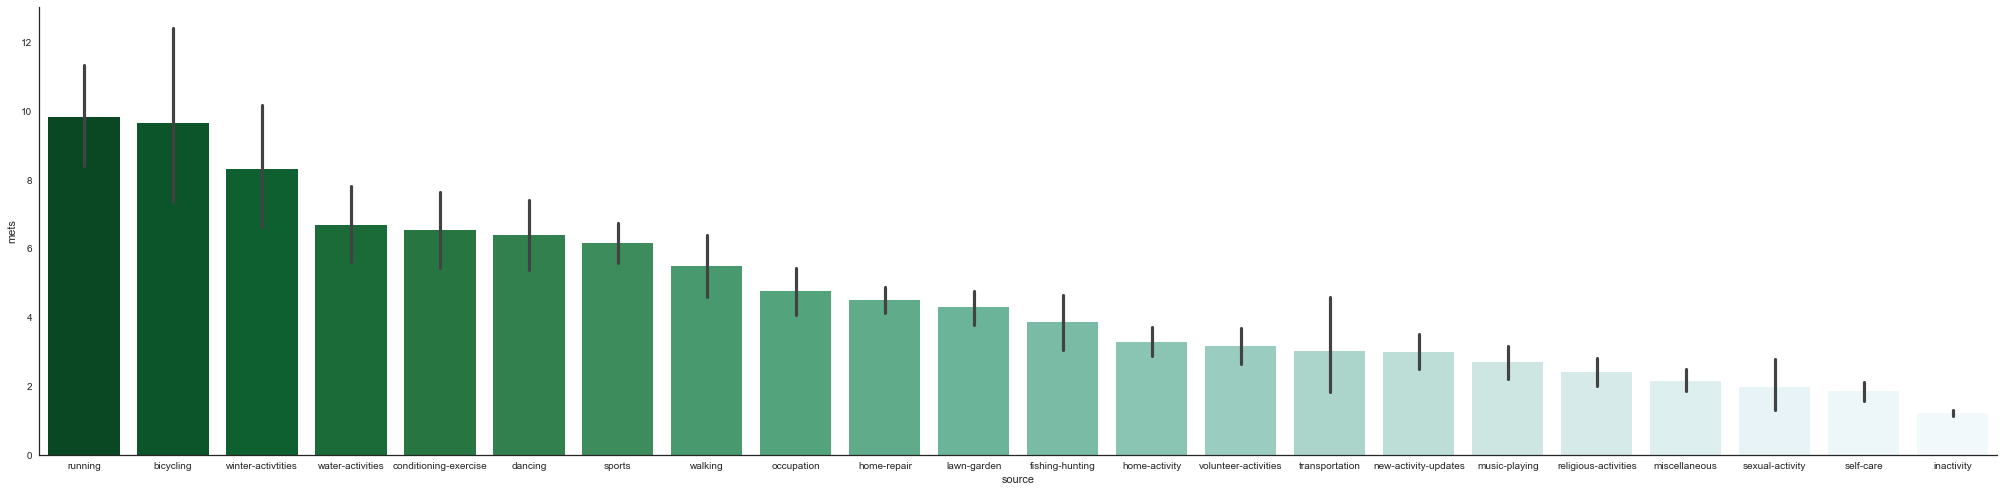

In [8]:
plt.close('all')
sns.set(style="white")
sns.factorplot(data=df, x="source", y="mets",kind="bar",palette="BuGn_r", size=7, aspect=4, order=df.groupby(['source']).mean().sort_values(by='mets',ascending=False).index)
plt.savefig('METs_mean.png',bbox_inches='tight')
plt.show()

### 3. frequency of each group

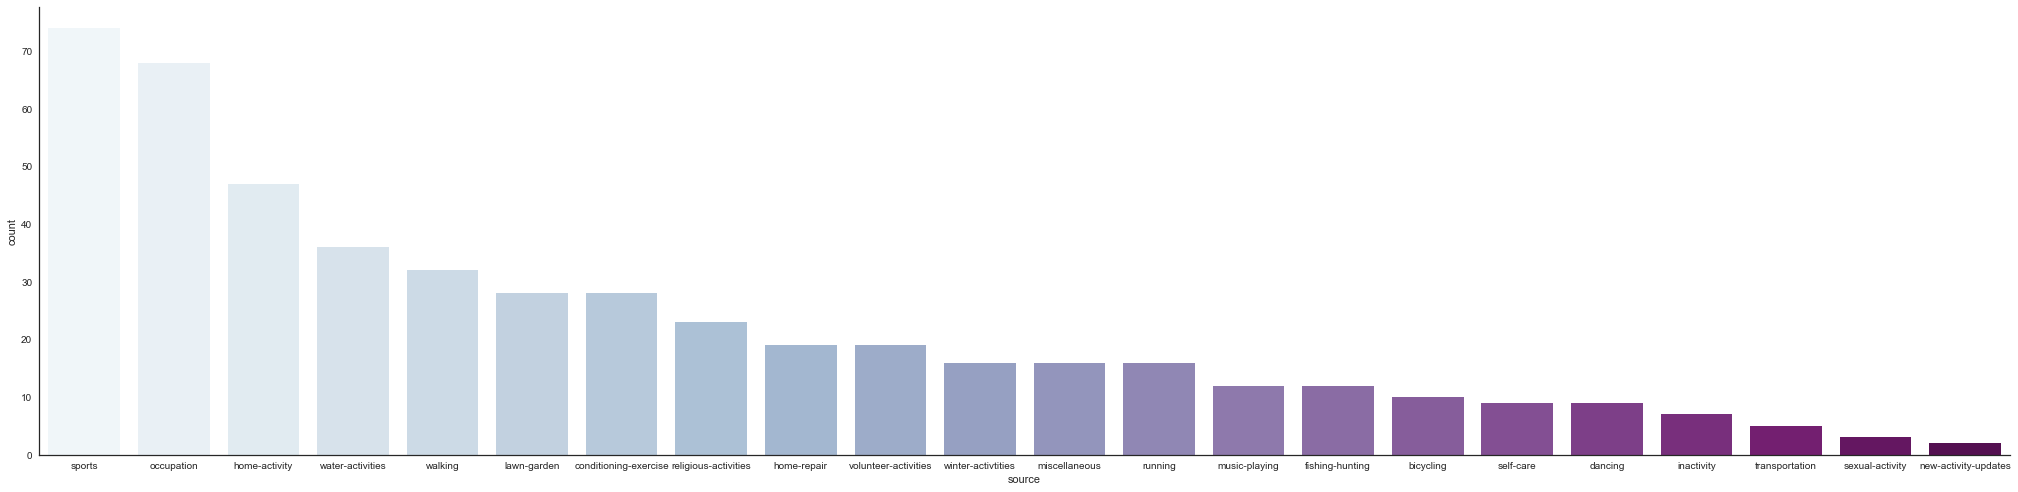

In [9]:
plt.close('all')
sns.set(style="white")
sns.factorplot(data=df, x="source", kind="count",palette="BuPu", size=7, aspect=4,order = df['source'].value_counts().index)
plt.savefig('METs_freq.png',bbox_inches='tight')
plt.show()